# Daisy Pinaroc
## Project Objective (Group Project)
To understand metrics and social media engagement of popular/most streamed artists on Spotify, and create effective visualizations to convey the relationships between the music, artist, and fan. 
### Individual Contributions
Conducted a data analysis on **scraped Instagram data of the top 5 Spotify artists for 2023**. Data was scraped using the Apify Instagram Scraper tool **https://apify.com/apify/instagram-scraper**. Visualizations were generated representing the engagement of these artists.

# Importing Instagram Data 

In [33]:
import pandas as pd
import json
import numpy as np
import ast

# Taylor Swift

In [34]:
# read in the data
df = pd.read_json('../datasets/tswift2_dataset_IGscraper.json')
df.head()

id            name  \
0  17841563782123506    taylornation   
1  17841563602099732          taylor   
2  17841563269105152     taylorswift   
3  17843785765049852   taylorswift13   
4  17841526885100586  taylorsversion   

                                                 url      searchTerm  \
0  https://www.instagram.com/explore/tags/taylorn...  'taylor swift'   
1      https://www.instagram.com/explore/tags/taylor  'taylor swift'   
2  https://www.instagram.com/explore/tags/taylors...  'taylor swift'   
3  https://www.instagram.com/explore/tags/taylors...  'taylor swift'   
4  https://www.instagram.com/explore/tags/taylors...  'taylor swift'   

                                            topPosts  \
0  [{'id': '3312229383576872930', 'type': 'Sideca...   
1  [{'id': '3312073737401585348', 'type': 'Sideca...   
2  [{'id': '3312851737793327831', 'type': 'Sideca...   
3  [{'id': '3312073737401585348', 'type': 'Sideca...   
4  [{'id': '3312229383576872930', 'type': 'Sideca...   

                                         latestPosts  \
0  [{'id': '3312866308856117174', 'type': 'Sideca...   
1  [{'id': '3312865461254310194', 'type': 'Image'...   
2  [{'id': '3312866985976503160', 'type': 'Image'...   
3  [{'id': '3312865127236749927', 'type': 'Image'...   
4  [{'id': '3312866308856117174', 'type': 'Sideca...   

                                            inputUrl  
0  https://www.instagram.com/explore/tags/taylorn...  
1     https://www.instagram.com/explore/tags/taylor/  
2  https://www.instagram.com/explore/tags/taylors...  
3  https://www.instagram.com/explore/tags/taylors...  
4  https://www.instagram.com/explore/tags/taylors...

In [35]:
# retrieving all posts: topPosts and latestPosts
# Initialize an empty list to store combined posts data from all rows
all_posts_data = []

# Iterate through each row of the DataFrame
for _, row in df.iterrows():
    # Combine 'topPosts' and 'latestPosts' for the current row
    combined_posts = row['topPosts'] + row['latestPosts']
    # Extend the all_posts_data list with the combined posts
    all_posts_data.extend(combined_posts)

# Convert the combined posts data from all rows into a DataFrame
df_posts = pd.DataFrame(all_posts_data)

In [36]:
df_posts.head(3)

id     type    shortCode  \
0  3312229383576872930  Sidecar  C33ZxNOtefi   
1  3312851737793327831  Sidecar  C35nRpwtPLX   
2  3312073737401585348  Sidecar  C322YQbuM7E   

                                             caption  \
0  Lil cutie patootie 🫶🏻\n.\n.\n.\n.\n.\n#taylors...   
1  👀| Taylor Swift at The Voice 2019\n.\n.\n@tayl...   
2  February 20, 2013 BRIT Awards #taylorswift #ta...   

                                            hashtags  \
0  [taylorswift, taylornation, tstheeerastour, th...   
1  [taylorswift, swifties, swiftie, swift, ts, ta...   
2  [taylorswift, taylorswifterastour, TSTheErasTo...   

                      mentions                                       url  \
0                           []  https://www.instagram.com/p/C33ZxNOtefi/   
1  [taylornation, taylorswift]  https://www.instagram.com/p/C35nRpwtPLX/   
2                           []  https://www.instagram.com/p/C322YQbuM7E/   

   commentsCount firstComment latestComments  ...  dimensionsWidth  \
0              1                          []  ...             1080   
1              0                          []  ...             1080   
2              0                          []  ...             1080   

                                          displayUrl images  \
0  https://scontent-lax3-2.cdninstagram.com/v/t51...     []   
1  https://scontent-lax3-1.cdninstagram.com/v/t51...     []   
2  https://scontent-lax3-1.cdninstagram.com/v/t51...     []   

                                                 alt likesCount  \
0  Photo shared by @t_lovestayyy on February 27, ...        281   
1  Photo shared by Westfall | Taylor Swift Archiv...         10   
2  Photo by Swifties Galore on February 27, 2024....         79   

                  timestamp childPosts      ownerId videoViewCount  \
0  2024-02-27T21:15:33.000Z         []  58124708388            NaN   
1  2024-02-28T17:52:03.000Z         []  60782176162            NaN   
2  2024-02-27T16:06:18.000Z         []  46591072381            NaN   

   productType  
0          NaN  
1          NaN  
2          NaN  

[3 rows x 21 columns]

In [37]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2901 non-null   object 
 1   type              2901 non-null   object 
 2   shortCode         2901 non-null   object 
 3   caption           2901 non-null   object 
 4   hashtags          2901 non-null   object 
 5   mentions          2901 non-null   object 
 6   url               2901 non-null   object 
 7   commentsCount     2901 non-null   int64  
 8   firstComment      2901 non-null   object 
 9   latestComments    2901 non-null   object 
 10  dimensionsHeight  2901 non-null   int64  
 11  dimensionsWidth   2901 non-null   int64  
 12  displayUrl        2901 non-null   object 
 13  images            2901 non-null   object 
 14  alt               2736 non-null   object 
 15  likesCount        2901 non-null   int64  
 16  timestamp         2901 non-null   object 


In [38]:
# dropping unnecessary columns
df_posts = df_posts.drop(['type', 'shortCode', 
                          'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
                         'childPosts', 'ownerId', 'videoViewCount', 'productType'], axis=1)

In [39]:
df_posts.head(2)

id                                            caption  \
0  3312229383576872930  Lil cutie patootie 🫶🏻\n.\n.\n.\n.\n.\n#taylors...   
1  3312851737793327831  👀| Taylor Swift at The Voice 2019\n.\n.\n@tayl...   

                                            hashtags  \
0  [taylorswift, taylornation, tstheeerastour, th...   
1  [taylorswift, swifties, swiftie, swift, ts, ta...   

                      mentions                                       url  \
0                           []  https://www.instagram.com/p/C33ZxNOtefi/   
1  [taylornation, taylorswift]  https://www.instagram.com/p/C35nRpwtPLX/   

   commentsCount firstComment latestComments  \
0              1                          []   
1              0                          []   

                                                 alt  likesCount  \
0  Photo shared by @t_lovestayyy on February 27, ...         281   
1  Photo shared by Westfall | Taylor Swift Archiv...          10   

                  timestamp  
0  2024-02-27T21:15:33.000Z  
1  2024-02-28T17:52:03.000Z

In [40]:
df_posts.shape

(2901, 11)

### Export to Excel file

In [41]:
# Specify your desired Excel file name
excel_file_path = 'tswift_IGposts.xlsx'

# Export the DataFrame to a CSV file
df_posts.to_excel(excel_file_path, index=False)

### Working with posts file

In [42]:
tswift_posts_df = pd.read_excel('tswift_IGposts.xlsx')

#### Exploratory Data Analysis & Cleaning

In [43]:
tswift_posts_df.head(15)

id                                            caption  \
0   3312229383576872930  Lil cutie patootie 🫶🏻\n.\n.\n.\n.\n.\n#taylors...   
1   3312851737793327831  👀| Taylor Swift at The Voice 2019\n.\n.\n@tayl...   
2   3312073737401585348  February 20, 2013 BRIT Awards #taylorswift #ta...   
3   3312403772768658320  🗓 27th Feb 2021: Taylor cancelled 'Lover Fest'...   
4   3312747188894401514  at least she acknowledges the chaos 😭\n.\n.\n@...   
5   3312161100056310170      “trash takes itself out every single time.” 💯   
6   3311993296564774251  lmk if u want part 2!!\n—\n#taylorswift #taylo...   
7   3312770502472051533  The only thing that can help me now ! 😭✨🩵💛🧡❤️🩶...   
8   3312781318843442241  Taylor yapma kızım düşeceksin \n\n#taylor #tay...   
9   3312866308856117174  💖LINK IN BIO💖 TS LOVER ERA | TS Friendship Bra...   
10  3312865578661608445  Taylor Swift Limited Edition T-shirt Sweater &...   
11  3312865461254310194       #taylorswift #taylornation #swifties #taylor   
12  3312865245943955601  Happy Hump Day, Swifties! \n.\n.\n.\n.\n.\n#sw...   
13  3312865127236749927  i was enchanted to meet u 🫶🏻\n\nfor tagged and...   
14  3312864754345990269  .\n@jackantonoff on Taylor's songwriting, via ...   

                                             hashtags  \
0   ['taylorswift', 'taylornation', 'tstheeerastou...   
1   ['taylorswift', 'swifties', 'swiftie', 'swift'...   
2   ['taylorswift', 'taylorswifterastour', 'TSTheE...   
3   ['taylorswiftedits', 'instagood', 'swifties', ...   
4   ['taylorswift', 'taylornation', 'taylorswift13...   
5                                                  []   
6   ['taylorswift', 'taylornation', 'debut', 'debu...   
7   ['taylorswift', 'taylorswiftedit', 'taylornati...   
8   ['taylor', 'taylorswift', 'taylornation', 'tay...   
9   ['taylorswift', 'karma', 'TaylorsVersion', 'ta...   
10  ['taylorswift', 'taylornation', 'taylorswifted...   
11  ['taylorswift', 'taylornation', 'swifties', 't...   
12  ['swifties', 'taylorswift', 'wednesday', 'hump...   
13  ['taylorswift', 'enchanted', 'speaknowtaylorsv...   
14                                                 []   

                           mentions                                       url  \
0                                []  https://www.instagram.com/p/C33ZxNOtefi/   
1   ['taylornation', 'taylorswift']  https://www.instagram.com/p/C35nRpwtPLX/   
2                                []  https://www.instagram.com/p/C322YQbuM7E/   
3                                []  https://www.instagram.com/p/C34Ba50iiOQ/   
4   ['taylornation', 'taylorswift']  https://www.instagram.com/p/C35PgRAuYPq/   
5                                []  https://www.instagram.com/p/C33KPjPuTGa/   
6                                []  https://www.instagram.com/p/C32kFsEN-Vr/   
7                                []  https://www.instagram.com/p/C35UzhePStN/   
8                                []  https://www.instagram.com/p/C35XQ7ANqRB/   
9                                []  https://www.instagram.com/p/C35qlsHune2/   
10               ['taylorswiftfit']  https://www.instagram.com/p/C35qbEEvnv9/   
11                               []  https://www.instagram.com/p/C35qZWuuUky/   
12  ['taylorswift', 'taylornation']  https://www.instagram.com/p/C35qWONOgCR/   
13                               []  https://www.instagram.com/p/C35qUfpucpn/   
14                 ['jackantonoff']  https://www.instagram.com/p/C35qPEXtFh9/   

    commentsCount  firstComment latestComments  \
0               1           NaN             []   
1               0           NaN             []   
2               0           NaN             []   
3               1           NaN             []   
4               0           NaN             []   
5               9           NaN             []   
6              81           NaN             []   
7               0           NaN             []   
8               0           NaN             []   
9               0           NaN             []   
10          

In [44]:
tswift_posts_df.shape

(2901, 11)

In [45]:
tswift_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2901 non-null   int64  
 1   caption         2897 non-null   object 
 2   hashtags        2901 non-null   object 
 3   mentions        2901 non-null   object 
 4   url             2901 non-null   object 
 5   commentsCount   2901 non-null   int64  
 6   firstComment    0 non-null      float64
 7   latestComments  2901 non-null   object 
 8   alt             2736 non-null   object 
 9   likesCount      2901 non-null   int64  
 10  timestamp       2901 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 249.4+ KB


In [46]:
tswift_posts_df.describe()

id  commentsCount  firstComment    likesCount
count  2.901000e+03    2901.000000           0.0   2901.000000
mean   3.233855e+18       5.260255           NaN    379.974836
std    2.003013e+17      16.180496           NaN   1658.312625
min    9.745296e+17       0.000000           NaN      0.000000
25%    3.275507e+18       0.000000           NaN      5.000000
50%    3.309515e+18       1.000000           NaN     22.000000
75%    3.312487e+18       4.000000           NaN    126.000000
max    3.312867e+18     395.000000           NaN  48729.000000

In [47]:
# find median of 'commentsCount' and 'likesCount'
comments_ct_median = tswift_posts_df['commentsCount'].median()
likes_ct_median = tswift_posts_df['likesCount'].median()
print ('commentsCount median:', comments_ct_median)
print ('likesCount median:', likes_ct_median)

commentsCount median: 1.0
likesCount median: 22.0


In [48]:
# find standard deviation of 'commentsCount' and 'likesCount'
# find median of 'commentsCount' and 'likesCount'
comments_ct_std = tswift_posts_df['commentsCount'].std()
likes_ct_std = tswift_posts_df['likesCount'].std()
print ('commentsCount std:', comments_ct_std)
print ('likesCount std:', likes_ct_std)

commentsCount std: 16.18049600078634
likesCount std: 1658.3126252789832


In [49]:
# Convert the 'timestamp' column to datetime
tswift_posts_df['timestamp'] = pd.to_datetime(tswift_posts_df['timestamp'])

# Calculate Mean and Median
mean_timestamp = tswift_posts_df['timestamp'].mean()
median_timestamp = tswift_posts_df['timestamp'].median()

# Calculate Range
range_timestamp = tswift_posts_df['timestamp'].max() - tswift_posts_df['timestamp'].min()

# For standard deviation, consider converting datetime to a numerical format like Unix timestamp (seconds since epoch)
tswift_posts_df['timestamp_numeric'] = tswift_posts_df['timestamp'].astype('int64')  // 10**9  # Convert to seconds
std_dev_timestamp = tswift_posts_df['timestamp_numeric'].std()

print("Median Timestamp:", median_timestamp)
print("Range:", range_timestamp)
print('Mean:', mean_timestamp)
print("Standard Deviation (in seconds):", std_dev_timestamp)

# Cleanup
tswift_posts_df.drop(['timestamp_numeric'], axis=1, inplace=True)

Median Timestamp: 2024-02-24 03:22:49+00:00
Range: 3226 days 06:59:03
Mean: 2023-11-11 17:58:45.918304+00:00
Standard Deviation (in seconds): 23877766.71517586


## Data Wrangling

In [50]:
# count missing values for each column
tswift_posts_df.isna().sum()

id                   0
caption              4
hashtags             0
mentions             0
url                  0
commentsCount        0
firstComment      2901
latestComments       0
alt                165
likesCount           0
timestamp            0
dtype: int64

In [51]:
# print all rows w/ missing data
null_df = tswift_posts_df[tswift_posts_df.isnull().any(axis=1)]
null_df.tail(10)

id                                            caption  \
2891  3311482056112798184  taylor core>>>>\n🦋🫶🎆🧣🗽🐍🌷🪐🥂🕰️🖋️\n\n#tay #taylor...   
2892  3311398414410148385  is active \n\nI think this photo of her is so ...   
2893  3311344872341365627  i once believed love would be black and white ...   
2894  3311342677377132361       I can't handle this mashup situation ANYMORE   
2895  3311297170756868274  “Cruel Summer” was the 7th best selling song i...   
2896  3311291084352257929  “Anti-Hero” was the 9th best selling song in t...   
2897  3311263819194205709  I just wanna look good for you 😍 -Vio♡\n•\n•\n...   
2898  3311217842433467054  Stunning goddess ❤️\n\n•\nTags 🏷: \n#selenagom...   
2899  3311184932456797528  🖤\n.\n.\n.\n.\n#justme #instagram #like #likes...   
2900  3311166152133241307  Foolish one 🤨\n\n#speaknow #drawing #fineliner...   

                                               hashtags  \
2891  ['tay', 'taylorswiftneedsahug', 'taylorwewills...   
2892  ['explore', 'explorepage', 'trending', 'trendi...   
2893  ['daylight', 'daylighttaylorswift', 'taylorswi...   
2894                                                 []   
2895                                                 []   
2896                                             ['9,']   
2897          ['SelenaGomez', 'Fans', 'SelenatorSpace']   
2898  ['selenagomez', 'selenamarie', 'selenamariegom...   
2899  ['justme', 'instagram', 'like', 'likesforlike'...   
2900  ['speaknow', 'drawing', 'fineliner', 'taylorna...   

                             mentions  \
2891  ['taylorswift', 'taylornation']   
2892                               []   
2893                               []   
2894                               []   
2895                               []   
2896                               []   
2897                               []   
2898                               []   
2899                               []   
2900                               []   

                                           url  commentsCount  firstComment  \
2891  https://www.instagram.com/p/C30v2KSrvno/              4           NaN   
2892  https://www.instagram.com/p/C30c1A4tWoh/              4           NaN   
2893  https://www.instagram.com/p/C30Qp38t-N7/             18           NaN   
2894  https://www.instagram.com/p/C30QJ7up6dJ/              5           NaN   
2895  https://www.instagram.com/p/C30FzuYuBiy/              7           NaN   
2896  https://www.instagram.com/p/C30EbJ-u_-J/              8           NaN   
2897  https://www.instagram.com/p/C3z-OZUrIYN/              2           NaN   
2898  https://www.instagram.com/p/C3zzxWILqKu/             16           NaN   
2899  https://www.instagram.com/p/C3zsScUtpVY/              6           NaN   
2900  https://www.instagram.com/p/C3zoBJyMunb/              1           NaN   

     latestComments                                                alt  \
2891             []  Photo by CJ (eras tour 15/8/23!) on February 2...   
2892             []  Photo shared by Mirrorballlover🪩 on February 2...   
2893             []  Photo by jiya madhyani💌 on February 26, 2024. ...   
2894             []  Photo by 𝑖𝑛𝑎𝑘𝑦 (𝑡𝑎𝑦𝑙𝑜𝑟'𝑠 𝑣𝑒𝑟𝑠𝑖𝑜𝑛) on February ...   
2895             []  Photo shared by Taylor Swift Charts on Februar...   
2896             []  Photo shared by Taylor Swift Charts on Februar...   
2897             []  Photo shared by ♡•𝓥𝓲𝓸𝓷𝓮 𝓢𝓮𝓵𝓮𝓷𝓪𝓽𝓸𝓻•♡ on Februar...   
2898             []  Photo shared by @selenygomess on February 26, ...   
2899             []  Photo by 𝙆𝙖𝙨𝙝𝙞𝙨𝙝 𝙒𝙖𝙙𝙝𝙬𝙖𝙣𝙞 on February 26, 2024...   
2900             []  Photo by Manon Coenen on February 26, 2024. Ma...   

      likesCount                 timestamp  
2891          21 2024-02-26 20:30:45+00:00  
2892         114 2024-02-26 17:44:34+00:00  
2893         335 2024-02-26 15:58:11+00:00  
2894         339 2024-02-26 15:53:49+00:00  
2895         829 2024-02-26 14:23:24+00:00  
2896         907 2024-02-26 14:11:19+00:00  
2897          23 2024-02-26 13:17:09+00:

In [52]:
tswift_posts_df.iloc[2638, 3]  

'[]'

In [53]:
# # converting string representations in 'hashtags' and 'mentions' to lists
# tswift_posts_df['hashtags'] = tswift_posts_df['hashtags'].apply(ast.literal_eval)
# tswift_posts_df['mentions'] = tswift_posts_df['mentions'].apply(ast.literal_eval)

In [54]:
# # Replace empty lists with NaN for the entire DataFrame
# tswift_posts_df = tswift_posts_df.applymap(lambda x: np.nan if x == '[]' else x)

The above code that's commented out might be used later in analysis.

In [55]:
# check for duplicates
print(tswift_posts_df.duplicated().sum())

554


In [56]:
# handling duplicates
# Keep the last occurrence of the duplicates
tswift_posts_df = tswift_posts_df.drop_duplicates(keep='last')
tswift_posts_df.shape

(2347, 11)

# Drake

In [57]:
df = pd.read_json('../datasets/drake_dataset_IGscraper.json')
df.head(1)

id        searchTerm  \
0  17842631230047214  'champagne papi'   

                                            topPosts  \
0  [{'id': '1163992850577354338', 'type': 'Video'...   

                                         latestPosts  
0  [{'id': '2860430978519410027', 'type': 'Image'...

In [58]:
# retrieving all posts: topPosts and latestPosts
# Initialize an empty list to store combined posts data from all rows
all_posts_data = []

# Iterate through each row of the DataFrame
for _, row in df.iterrows():
    # Combine 'topPosts' and 'latestPosts' for the current row
    combined_posts = row['topPosts'] + row['latestPosts']
    # Extend the all_posts_data list with the combined posts
    all_posts_data.extend(combined_posts)

# Convert the combined posts data from all rows into a DataFrame
df_posts = pd.DataFrame(all_posts_data)

In [59]:
df_posts.head(5)

id   type    shortCode  \
0  1163992850577354338  Video  BAnVVSbwe5i   
1  2860430978519410027  Image  CeyStHbLCVr   
2  1776840984115984132  Image  Biom3YAlrcE   
3  1616464473978353046  Image  BZu1d_rhLWW   
4   888572360328427770  Image   xU19qWmzj6   

                                             caption  \
0  Pigs: Always on Beat. 🐷🐷🐷 #drake #hotlinebling...   
1  Piggy again 🤗🥂\n\n#cheers #🥂 #🥂🍾 #piggyontour ...   
2  i know this feeling \n#illhavewhatheshaving #r...   
3  These two foster piggies got names today. Plea...   
4  Happy New Year! This year I'm gonna be hotter ...   

                                            hashtags mentions  \
0                [drake, hotlinebling, onloopallday]       []   
1  [cheers, 🥂, 🥂🍾, piggyontour, pigletontour, pig...       []   
2  [illhavewhatheshaving, rogerwaters, usandthemt...       []   
3  [champagnepiggy, fosterpig, rescuepig, adoptdo...       []   
4                          [champagnepiggy, hogwild]       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/BAnVVSbwe5i/             61                
1  https://www.instagram.com/p/CeyStHbLCVr/              0                
2  https://www.instagram.com/p/Biom3YAlrcE/              8                
3  https://www.instagram.com/p/BZu1d_rhLWW/              1                
4   https://www.instagram.com/p/xU19qWmzj6/            143                

  latestComments  ...  dimensionsWidth  \
0             []  ...              640   
1             []  ...             1080   
2             []  ...             1080   
3             []  ...             1080   
4             []  ...              640   

                                          displayUrl images  \
0  https://instagram.ftas1-1.fna.fbcdn.net/v/t51....     []   
1  https://instagram.ftas1-2.fna.fbcdn.net/v/t51....     []   
2  https://instagram.ftas1-2.fna.fbcdn.net/v/t51....     []   
3  https://instagram.ftas1-1.fna.fbcdn.net/v/t51....     []   
4  https://instagram.ftas1-1.fna.fbcdn.net/v/t51....     []   

                                                 alt likesCount  \
0                                               None        253   
1               Photo by Yvonne ✈️ on June 14, 2022.          8   
2                Photo by kate izor on May 11, 2018.        629   
3  Photo by Hope's Ranch Rescue on October 01, 2017.         71   
4  Photo by 🐷Bacon and Pancetta🐷 on January 01, 2...       6458   

   videoViewCount                 timestamp childPosts     ownerId productType  
0             0.0  2016-01-16T21:13:02.000Z         []   293529218        feed  
1             NaN  2022-06-14T12:32:46.000Z         []  4538159945         NaN  
2             NaN  2018-05-11T10:52:53.000Z         []  3529513424         NaN  
3             NaN  2017-10-02T04:13:23.000Z         []  3248606482         NaN  
4             NaN  2015-01-01T21:01:41.000Z         []  1063951741         NaN  

[5 rows x 21 columns]

In [60]:
df_posts.shape

(2415, 21)

In [61]:
# dropping unnecessary columns
df_posts = df_posts.drop(['type', 'shortCode', 
                          'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
                         'childPosts', 'ownerId', 'videoViewCount', 'productType'], axis=1)

In [62]:
df_posts.head(2)

id                                            caption  \
0  1163992850577354338  Pigs: Always on Beat. 🐷🐷🐷 #drake #hotlinebling...   
1  2860430978519410027  Piggy again 🤗🥂\n\n#cheers #🥂 #🥂🍾 #piggyontour ...   

                                            hashtags mentions  \
0                [drake, hotlinebling, onloopallday]       []   
1  [cheers, 🥂, 🥂🍾, piggyontour, pigletontour, pig...       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/BAnVVSbwe5i/             61                
1  https://www.instagram.com/p/CeyStHbLCVr/              0                

  latestComments                                   alt  likesCount  \
0             []                                  None         253   
1             []  Photo by Yvonne ✈️ on June 14, 2022.           8   

                  timestamp  
0  2016-01-16T21:13:02.000Z  
1  2022-06-14T12:32:46.000Z

### Export to Excel file

In [63]:
# Specify your desired excel file name
excel_file_path = 'drake_IGposts.xlsx'

# Export the DataFrame to a CSV file
df_posts.to_excel(excel_file_path, index=False)

### Working with posts file

In [64]:
df_posts = pd.read_excel('drake_IGposts.xlsx')

#### EDA & Cleaning

In [65]:
df_posts.head(3)

id                                            caption  \
0  1163992850577354338  Pigs: Always on Beat. 🐷🐷🐷 #drake #hotlinebling...   
1  2860430978519410027  Piggy again 🤗🥂\n\n#cheers #🥂 #🥂🍾 #piggyontour ...   
2  1776840984115984132  i know this feeling \n#illhavewhatheshaving #r...   

                                            hashtags mentions  \
0          ['drake', 'hotlinebling', 'onloopallday']       []   
1  ['cheers', '🥂', '🥂🍾', 'piggyontour', 'pigleton...       []   
2  ['illhavewhatheshaving', 'rogerwaters', 'usand...       []   

                                        url  commentsCount  firstComment  \
0  https://www.instagram.com/p/BAnVVSbwe5i/             61           NaN   
1  https://www.instagram.com/p/CeyStHbLCVr/              0           NaN   
2  https://www.instagram.com/p/Biom3YAlrcE/              8           NaN   

  latestComments                                   alt  likesCount  \
0             []                                   NaN         253   
1             []  Photo by Yvonne ✈️ on June 14, 2022.           8   
2             []   Photo by kate izor on May 11, 2018.         629   

                  timestamp  
0  2016-01-16T21:13:02.000Z  
1  2022-06-14T12:32:46.000Z  
2  2018-05-11T10:52:53.000Z

In [66]:
df_posts.shape

(2415, 11)

In [67]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2415 non-null   int64  
 1   caption         2406 non-null   object 
 2   hashtags        2415 non-null   object 
 3   mentions        2415 non-null   object 
 4   url             2415 non-null   object 
 5   commentsCount   2415 non-null   int64  
 6   firstComment    0 non-null      float64
 7   latestComments  2415 non-null   object 
 8   alt             2137 non-null   object 
 9   likesCount      2415 non-null   int64  
 10  timestamp       2415 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 207.7+ KB


In [68]:
df_posts.describe()

id  commentsCount  firstComment     likesCount
count  2.415000e+03    2415.000000           0.0    2415.000000
mean   2.928393e+18      15.130021           NaN     912.024431
std    4.817188e+17     117.436519           NaN    6427.782001
min    5.783397e+17       0.000000           NaN       0.000000
25%    2.652069e+18       0.000000           NaN       8.500000
50%    3.156388e+18       2.000000           NaN      28.000000
75%    3.294869e+18       7.000000           NaN     192.000000
max    3.312889e+18    5157.000000           NaN  277413.000000

In [69]:
# find median & mean of 'commentsCount' and 'likesCount'
comments_ct_median = df_posts['commentsCount'].median()
likes_ct_median = df_posts['likesCount'].median()
print ('commentsCount median:', comments_ct_median)
print ('likesCount median:', likes_ct_median)

commentsCount median: 2.0
likesCount median: 28.0


In [70]:
# find standard deviation of 'commentsCount' and 'likesCount'
comments_ct_std = df_posts['commentsCount'].std()
likes_ct_std = df_posts['likesCount'].std()
print ('commentsCount std:', comments_ct_std)
print ('likesCount std:', likes_ct_std)

commentsCount std: 117.4365191445577
likesCount std: 6427.782001048794


In [71]:
# Convert the 'timestamp' column to datetime
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])

# Calculate Mean and Median
mean_timestamp = df_posts['timestamp'].mean()
median_timestamp = df_posts['timestamp'].median()

# Calculate Range
range_timestamp = df_posts['timestamp'].max() - df_posts['timestamp'].min()

# For standard deviation, consider converting datetime to a numerical format like Unix timestamp (seconds since epoch)
df_posts['timestamp_numeric'] = df_posts['timestamp'].astype('int64')  // 10**9  # Convert to seconds
std_dev_timestamp = df_posts['timestamp_numeric'].std()

print("Median Timestamp:", median_timestamp)
print("Range:", range_timestamp)
print('Mean:', mean_timestamp)
print("Standard Deviation (in seconds):", std_dev_timestamp)

# Cleanup
df_posts.drop(['timestamp_numeric'], axis=1, inplace=True)

Median Timestamp: 2023-07-27 20:46:54+00:00
Range: 3772 days 23:00:33
Mean: 2022-09-16 07:01:09.684472064+00:00
Standard Deviation (in seconds): 57425336.703010276


## Data Wrangling

In [72]:
# count missing values for each column
df_posts.isna().sum()

id                   0
caption              9
hashtags             0
mentions             0
url                  0
commentsCount        0
firstComment      2415
latestComments       0
alt                278
likesCount           0
timestamp            0
dtype: int64

In [73]:
# check for duplicates
print(df_posts.duplicated().sum())

249


In [74]:
# handling duplicates
# Keep the last occurrence of the duplicates
df_posts = df_posts.drop_duplicates(keep='last')
df_posts.shape

(2166, 11)

# The Weeknd

In [75]:
df = pd.read_json('../datasets/theWeeknd_dataset_IGscraper.json')
df.head(1)

id    searchTerm  \
0  17842247740067742  'the weeknd'   

                                            topPosts  \
0  [{'id': '3309278047079769723', 'type': 'Sideca...   

                                         latestPosts  
0  [{'id': '3312866941691241626', 'type': 'Image'...

In [76]:
# retrieving all posts: topPosts and latestPosts
# Initialize an empty list to store combined posts data from all rows
all_posts_data = []

# Iterate through each row of the DataFrame
for _, row in df.iterrows():
    # Combine 'topPosts' and 'latestPosts' for the current row
    combined_posts = row['topPosts'] + row['latestPosts']
    # Extend the all_posts_data list with the combined posts
    all_posts_data.extend(combined_posts)

# Convert the combined posts data from all rows into a DataFrame
df_posts = pd.DataFrame(all_posts_data)

In [77]:
df_posts.shape

(2907, 21)

In [78]:
# dropping unnecessary columns
df_posts = df_posts.drop(['type', 'shortCode', 
                          'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
                         'childPosts', 'ownerId', 'videoViewCount', 'productType'], axis=1)

In [79]:
df_posts.head(2)

id                                            caption  \
0  3309278047079769723                                                      
1  3312294004270783838  💚💚💚\n.\n.\n@theweeknd \n.\n.\n#theweeknd #thew...   

                                            hashtags     mentions  \
0                                                 []           []   
1  [theweeknd, theweekndxo, theweekndfans, xo, xo...  [theweeknd]   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/C3s6tm7MCZ7/              3                
1  https://www.instagram.com/p/C33odj8N11e/              6                

  latestComments                                                alt  \
0             []  Photo by @thebirdsparty on February 23, 2024. ...   
1             []  Photo by abelxohours on February 27, 2024. May...   

   likesCount                 timestamp  
0        2313  2024-02-23T19:31:46.000Z  
1          74  2024-02-27T23:23:56.000Z

### Export to Excel file

In [80]:
# Specify your desired excel file name
excel_file_path = 'theWeeknd_IGposts.xlsx'

# Export the DataFrame to a CSV file
df_posts.to_excel(excel_file_path, index=False)

### Working with posts file

In [81]:
df_posts = pd.read_excel('theWeeknd_IGposts.xlsx')

### EDA & Cleaning

In [82]:
df_posts.head(3)

id                                            caption  \
0  3309278047079769723                                                NaN   
1  3312294004270783838  💚💚💚\n.\n.\n@theweeknd \n.\n.\n#theweeknd #thew...   
2  3299857861301420834  Never stop being a good person, even to the un...   

                                            hashtags       mentions  \
0                                                 []             []   
1  ['theweeknd', 'theweekndxo', 'theweekndfans', ...  ['theweeknd']   
2  ['theweeknd', 'theweekndfans', 'trilogy', 'xot...  ['theweeknd']   

                                        url  commentsCount  firstComment  \
0  https://www.instagram.com/p/C3s6tm7MCZ7/              3           NaN   
1  https://www.instagram.com/p/C33odj8N11e/              6           NaN   
2  https://www.instagram.com/p/C3Lcz3QJsMi/              5           NaN   

  latestComments                                                alt  \
0             []  Photo by @thebirdsparty on February 23, 2024. ...   
1             []  Photo by abelxohours on February 27, 2024. May...   
2             []  Photo by ℌ𝔬𝔭𝔢 𝔑𝔦𝔠𝔬𝔩𝔢 🥀 on February 10, 2024. M...   

   likesCount                 timestamp  
0        2313  2024-02-23T19:31:46.000Z  
1          74  2024-02-27T23:23:56.000Z  
2         104  2024-02-10T19:35:33.000Z

In [83]:
df_posts.shape

(2907, 11)

In [84]:
df_posts.describe()

id  commentsCount  firstComment     likesCount
count  2.907000e+03    2907.000000           0.0    2907.000000
mean   3.019408e+18       7.147919           NaN     722.120055
std    5.370218e+17      26.823634           NaN    6403.649402
min    8.522517e+17       0.000000           NaN       0.000000
25%    3.015093e+18       0.000000           NaN      16.000000
50%    3.296709e+18       2.000000           NaN      58.000000
75%    3.310103e+18       6.000000           NaN     204.500000
max    3.312895e+18     742.000000           NaN  224727.000000

In [85]:
# find median & mean of 'commentsCount' and 'likesCount'
comments_ct_median = df_posts['commentsCount'].median()
likes_ct_median = df_posts['likesCount'].median()
print ('commentsCount median:', comments_ct_median)
print ('likesCount median:', likes_ct_median)

commentsCount median: 2.0
likesCount median: 58.0


In [86]:
# find standard deviation of 'commentsCount' and 'likesCount'
comments_ct_std = df_posts['commentsCount'].std()
likes_ct_std = df_posts['likesCount'].std()
print ('commentsCount std:', comments_ct_std)
print ('likesCount std:', likes_ct_std)

commentsCount std: 26.82363439808944
likesCount std: 6403.649401524065


In [87]:
# Convert the 'timestamp' column to datetime
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])

# Calculate Mean and Median
mean_timestamp = df_posts['timestamp'].mean()
median_timestamp = df_posts['timestamp'].median()

# Calculate Range
range_timestamp = df_posts['timestamp'].max() - df_posts['timestamp'].min()

# For standard deviation, consider converting datetime to a numerical format like Unix timestamp (seconds since epoch)
df_posts['timestamp_numeric'] = df_posts['timestamp'].astype('int64')  // 10**9  # Convert to seconds
std_dev_timestamp = df_posts['timestamp_numeric'].std()

print("Median Timestamp:", median_timestamp)
print("Range:", range_timestamp)
print('Mean:', mean_timestamp)
print("Standard Deviation (in seconds):", std_dev_timestamp)

# Cleanup
df_posts.drop(['timestamp_numeric'], axis=1, inplace=True)

Median Timestamp: 2024-02-06 11:19:52+00:00
Range: 3395 days 00:59:59
Mean: 2023-01-19 20:53:38.163054336+00:00
Standard Deviation (in seconds): 64018016.04498195


## Data Wrangling

In [88]:
# count missing values for each column
df_posts.isna().sum()

id                   0
caption             17
hashtags             0
mentions             0
url                  0
commentsCount        0
firstComment      2907
latestComments       0
alt                379
likesCount           0
timestamp            0
dtype: int64

In [89]:
# check for duplicates
print(df_posts.duplicated().sum())

599


In [90]:
# handling duplicates
# Keep the last occurrence of the duplicates
df_posts = df_posts.drop_duplicates(keep='last')
df_posts.shape

(2308, 11)

# Ed Sheeran

In [91]:
df = pd.read_json('../datasets/edSheeran_dataset_IGscraper.json')
df.head(1)

id    searchTerm  \
0  17843745766011360  'ed sheeran'   

                                            topPosts  \
0  [{'id': '3106214298603612666', 'type': 'Image'...   

                                         latestPosts  
0  [{'id': '3312630253406577038', 'type': 'Image'...

In [92]:
# retrieving all posts: topPosts and latestPosts
# Initialize an empty list to store combined posts data from all rows
all_posts_data = []

# Iterate through each row of the DataFrame
for _, row in df.iterrows():
    # Combine 'topPosts' and 'latestPosts' for the current row
    combined_posts = row['topPosts'] + row['latestPosts']
    # Extend the all_posts_data list with the combined posts
    all_posts_data.extend(combined_posts)

# Convert the combined posts data from all rows into a DataFrame
df_posts = pd.DataFrame(all_posts_data)

In [93]:
df_posts.head(1)

id   type    shortCode  \
0  3106214298603612666  Image  CsbfXJ4gen6   

                                             caption  \
0  Iconic 👀 \n.\n.\n.\n.\n.\n#edsheeran #sheeran ...   

                                        hashtags mentions  \
0  [edsheeran, sheeran, sheerio, sheerios, meme]       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/CsbfXJ4gen6/             78                

  latestComments  ...  dimensionsWidth  \
0             []  ...             1080   

                                          displayUrl images  \
0  https://instagram.flim15-2.fna.fbcdn.net/v/t51...     []   

                                                 alt likesCount  \
0  Photo shared by Fluffy on May 19, 2023 tagging...       3829   

                  timestamp childPosts     ownerId videoViewCount  productType  
0  2023-05-19T15:20:21.000Z         []  4264892571            NaN          NaN  

[1 rows x 21 columns]

In [94]:
df_posts.shape

(2828, 21)

In [95]:
# dropping unnecessary columns
df_posts = df_posts.drop(['type', 'shortCode', 
                          'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
                         'childPosts', 'ownerId', 'videoViewCount', 'productType'], axis=1)

In [96]:
df_posts.head(1)

id                                            caption  \
0  3106214298603612666  Iconic 👀 \n.\n.\n.\n.\n.\n#edsheeran #sheeran ...   

                                        hashtags mentions  \
0  [edsheeran, sheeran, sheerio, sheerios, meme]       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/CsbfXJ4gen6/             78                

  latestComments                                                alt  \
0             []  Photo shared by Fluffy on May 19, 2023 tagging...   

   likesCount                 timestamp  
0        3829  2023-05-19T15:20:21.000Z

### Export to Excel file

In [97]:
# Specify your desired excel file name
excel_file_path = 'edSheeran_IGposts.xlsx'

# Export the DataFrame to a CSV file
df_posts.to_excel(excel_file_path, index=False)

### Working with posts file

In [98]:
df_posts = pd.read_excel('edSheeran_IGposts.xlsx')

#### EDA & Cleaning

In [99]:
df_posts.head(3)

id                                            caption  \
0  3106214298603612666  Iconic 👀 \n.\n.\n.\n.\n.\n#edsheeran #sheeran ...   
1  3289547244977365137  2024.01.27.\n🇬🇧 Ed Sheeran 🇬🇧\n+-=÷x Tour 2024...   
2  3164992927096600561  So this is my kind of waiting for Autumn🍂🍁📿 \n...   

                                            hashtags  \
0  ['edsheeran', 'sheeran', 'sheerio', 'sheerios'...   
1  ['Edsheeran', 'ed', 'sheeran', 'エドシーラン', 'Eyes...   
2  ['edsheeran', 'teddysphotos', 'edhq', 'sheerio...   

                   mentions                                       url  \
0                        []  https://www.instagram.com/p/CsbfXJ4gen6/   
1                        []  https://www.instagram.com/p/C2m0cpgvaCR/   
2  ['teddysphotos', 'edhq']  https://www.instagram.com/p/CvsUExgN3fx/   

   commentsCount  firstComment latestComments  \
0             78           NaN             []   
1              0           NaN             []   
2             27           NaN             []   

                                                 alt  likesCount  \
0  Photo shared by Fluffy on May 19, 2023 tagging...        3829   
1  Photo by ∀И on January 27, 2024. May be a vide...         240   
2  Photo shared by Nina- Sheerio from Germany on ...        1333   

                  timestamp  
0  2023-05-19T15:20:21.000Z  
1  2024-01-27T14:10:11.000Z  
2  2023-08-08T17:43:00.000Z

In [100]:
df_posts.shape

(2828, 11)

In [101]:
df_posts.describe()

id  commentsCount  firstComment    likesCount
count  2.828000e+03    2828.000000           0.0   2828.000000
mean   2.909924e+18       6.018741           NaN    293.070721
std    5.517751e+17      37.006247           NaN   2372.799804
min    9.419641e+17       0.000000           NaN      0.000000
25%    2.697850e+18       0.000000           NaN     15.000000
50%    3.205021e+18       1.000000           NaN     43.000000
75%    3.303635e+18       4.000000           NaN    116.000000
max    3.312894e+18    1659.000000           NaN  82247.000000

In [102]:
# find median & mean of 'commentsCount' and 'likesCount'
comments_ct_median = df_posts['commentsCount'].median()
likes_ct_median = df_posts['likesCount'].median()
print ('commentsCount median:', comments_ct_median)
print ('likesCount median:', likes_ct_median)

commentsCount median: 1.0
likesCount median: 43.0


In [103]:
# find standard deviation of 'commentsCount' and 'likesCount'
comments_ct_std = df_posts['commentsCount'].std()
likes_ct_std = df_posts['likesCount'].std()
print ('commentsCount std:', comments_ct_std)
print ('likesCount std:', likes_ct_std)

commentsCount std: 37.00624717439282
likesCount std: 2372.7998035285154


In [104]:
# Convert the 'timestamp' column to datetime
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])

# Calculate Mean and Median
mean_timestamp = df_posts['timestamp'].mean()
median_timestamp = df_posts['timestamp'].median()

# Calculate Range
range_timestamp = df_posts['timestamp'].max() - df_posts['timestamp'].min()

# For standard deviation, consider converting datetime to a numerical format like Unix timestamp (seconds since epoch)
df_posts['timestamp_numeric'] = df_posts['timestamp'].astype('int64')  // 10**9  # Convert to seconds
std_dev_timestamp = df_posts['timestamp_numeric'].std()

print("Median Timestamp:", median_timestamp)
print("Range:", range_timestamp)
print('Mean:', mean_timestamp)
print("Standard Deviation (in seconds):", std_dev_timestamp)

# Cleanup
df_posts.drop(['timestamp_numeric'], axis=1, inplace=True)

Median Timestamp: 2023-10-02 23:11:04+00:00
Range: 3271 days 06:13:47
Mean: 2022-08-21 19:26:26.610325504+00:00
Standard Deviation (in seconds): 65776697.571657464


## Data Wrangling

In [105]:
# count missing values for each column
df_posts.isna().sum()

id                   0
caption              3
hashtags             0
mentions             0
url                  0
commentsCount        0
firstComment      2828
latestComments       0
alt                403
likesCount           0
timestamp            0
dtype: int64

In [106]:
# check for duplicates
print(df_posts.duplicated().sum())

502


In [107]:
# handling duplicates
# Keep the last occurrence of the duplicates
df_posts = df_posts.drop_duplicates(keep='last')
df_posts.shape

(2326, 11)

# Bad Bunny

In [108]:
df = pd.read_json('../datasets/badBunny_dataset_IGscraper.json')
df.head(1)

id   searchTerm  \
0  17843719966011548  'bad bunny'   

                                            topPosts  \
0  [{'id': '3312805714877915100', 'type': 'Image'...   

                                         latestPosts  
0  [{'id': '3312900812610749054', 'type': 'Image'...

In [109]:
# retrieving all posts: topPosts and latestPosts
# Initialize an empty list to store combined posts data from all rows
all_posts_data = []

# Iterate through each row of the DataFrame
for _, row in df.iterrows():
    # Combine 'topPosts' and 'latestPosts' for the current row
    combined_posts = row['topPosts'] + row['latestPosts']
    # Extend the all_posts_data list with the combined posts
    all_posts_data.extend(combined_posts)

# Convert the combined posts data from all rows into a DataFrame
df_posts = pd.DataFrame(all_posts_data)

In [110]:
df_posts.head(1)

id   type    shortCode  \
0  3312805714877915100  Image  C35cz7lLp_c   

                                             caption  \
0  🥺\n👉🏻👈🏻\n-\n-\n-\n-\n#norteñas #explorepage #r...   

                                            hashtags mentions  \
0  [norteñas, explorepage, reelsmexicanos, bailes...       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/C35cz7lLp_c/              0                

  latestComments  ...  dimensionsWidth  \
0             []  ...             1080   

                                          displayUrl images  \
0  https://instagram.fsof10-1.fna.fbcdn.net/v/t51...     []   

                                                 alt likesCount  \
0  Photo by @pinchescorridos on February 28, 2024...        123   

                  timestamp childPosts      ownerId videoViewCount  \
0  2024-02-28T16:20:37.000Z         []  59154962617            NaN   

   productType  
0          NaN  

[1 rows x 21 columns]

In [111]:
df_posts.shape

(2305, 21)

In [112]:
# dropping unnecessary columns
df_posts = df_posts.drop(['type', 'shortCode', 
                          'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images',
                         'childPosts', 'ownerId', 'videoViewCount', 'productType'], axis=1)

In [113]:
df_posts.head(2)

id                                            caption  \
0  3312805714877915100  🥺\n👉🏻👈🏻\n-\n-\n-\n-\n#norteñas #explorepage #r...   
1  3312849919729869506                Bad Bunny Anoche Con Algunos Fans 🔥   

                                            hashtags mentions  \
0  [norteñas, explorepage, reelsmexicanos, bailes...       []   
1                                                 []       []   

                                        url  commentsCount firstComment  \
0  https://www.instagram.com/p/C35cz7lLp_c/              0                
1  https://www.instagram.com/p/C35m3MjriLC/              2                

  latestComments                                                alt  \
0             []  Photo by @pinchescorridos on February 28, 2024...   
1             []  Photo by BAD BUNNY NEWS on February 28, 2024. ...   

   likesCount                 timestamp  
0         123  2024-02-28T16:20:37.000Z  
1         152  2024-02-28T17:48:27.000Z

### Export to Excel file

In [114]:
# Specify your desired excel file name
excel_file_path = 'badBunny_IGposts.xlsx'

# Export the DataFrame to a CSV file
df_posts.to_excel(excel_file_path, index=False)

### Working with posts file

In [115]:
df_posts = pd.read_excel('badBunny_IGposts.xlsx')

#### EDA & Cleaning

In [116]:
df_posts.head(3)

id                                            caption  \
0  3312805714877915100  🥺\n👉🏻👈🏻\n-\n-\n-\n-\n#norteñas #explorepage #r...   
1  3312849919729869506                Bad Bunny Anoche Con Algunos Fans 🔥   
2  3312782426802543607  KarolG junto a @sergiogeorge 🤍👀\n\n"\n\n_\n\n_...   

                                            hashtags  \
0  ['norteñas', 'explorepage', 'reelsmexicanos', ...   
1                                                 []   
2  ['barranquilla', 'BICHOTA', 'kanyewest', 'maki...   

                                            mentions  \
0                                                 []   
1                                                 []   
2  ['sergiogeorge', 'anuel', 'kendalljenner', 'ka...   

                                        url  commentsCount  firstComment  \
0  https://www.instagram.com/p/C35cz7lLp_c/              0           NaN   
1  https://www.instagram.com/p/C35m3MjriLC/              2           NaN   
2  https://www.instagram.com/p/C35XhC3uNv3/              3           NaN   

  latestComments                                                alt  \
0             []  Photo by @pinchescorridos on February 28, 2024...   
1             []  Photo by BAD BUNNY NEWS on February 28, 2024. ...   
2             []  Photo by karolina giraldo on February 28, 2024...   

   likesCount                 timestamp  
0         123  2024-02-28T16:20:37.000Z  
1         152  2024-02-28T17:48:27.000Z  
2          56  2024-02-28T15:34:21.000Z

In [117]:
df_posts.shape

(2305, 11)

In [118]:
df_posts.describe()

id  commentsCount  firstComment    likesCount
count  2.305000e+03    2305.000000           0.0   2305.000000
mean   3.086248e+18       8.102386           NaN    566.825163
std    2.956591e+17      33.258965           NaN   1815.421014
min    1.629878e+18       0.000000           NaN      0.000000
25%    2.970708e+18       0.000000           NaN      8.000000
50%    3.197465e+18       1.000000           NaN     44.000000
75%    3.310230e+18       4.000000           NaN    301.000000
max    3.312901e+18     702.000000           NaN  42802.000000

In [119]:
# find median & mean of 'commentsCount' and 'likesCount'
comments_ct_median = df_posts['commentsCount'].median()
likes_ct_median = df_posts['likesCount'].median()
print ('commentsCount median:', comments_ct_median)
print ('likesCount median:', likes_ct_median)

commentsCount median: 1.0
likesCount median: 44.0


In [120]:
# find standard deviation of 'commentsCount' and 'likesCount'
comments_ct_std = df_posts['commentsCount'].std()
likes_ct_std = df_posts['likesCount'].std()
print ('commentsCount std:', comments_ct_std)
print ('likesCount std:', likes_ct_std)

commentsCount std: 33.25896545845127
likesCount std: 1815.4210136582215


In [121]:
# Convert the 'timestamp' column to datetime
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])

# Calculate Mean and Median
mean_timestamp = df_posts['timestamp'].mean()
median_timestamp = df_posts['timestamp'].median()

# Calculate Range
range_timestamp = df_posts['timestamp'].max() - df_posts['timestamp'].min()

# For standard deviation, consider converting datetime to a numerical format like Unix timestamp (seconds since epoch)
df_posts['timestamp_numeric'] = df_posts['timestamp'].astype('int64')  // 10**9  # Convert to seconds
std_dev_timestamp = df_posts['timestamp_numeric'].std()

print("Median Timestamp:", median_timestamp)
print("Range:", range_timestamp)
print('Mean:', mean_timestamp)
print("Standard Deviation (in seconds):", std_dev_timestamp)

# Cleanup
df_posts.drop(['timestamp_numeric'], axis=1, inplace=True)

Median Timestamp: 2023-09-22 12:58:36+00:00
Range: 2322 days 03:06:08
Mean: 2023-04-22 02:12:00.469414144+00:00
Standard Deviation (in seconds): 35245295.68178237


## Data Wrangling

In [122]:
# count missing values for each column
df_posts.isna().sum()

id                   0
caption              9
hashtags             0
mentions             0
url                  0
commentsCount        0
firstComment      2305
latestComments       0
alt                244
likesCount           0
timestamp            0
dtype: int64

In [123]:
# check for duplicates
print(df_posts.duplicated().sum())

462


In [124]:
# handling duplicates
# Keep the last occurrence of the duplicates
df_posts = df_posts.drop_duplicates(keep='last')
df_posts.shape

(1843, 11)

In [125]:
import pandas as pd
import json
import numpy as np
import ast
import os

# VISUALIZATION: Top Artists Instagram Post Content vs Post Metrics
These visualizations will represent the relationship that exists between Instagram individual post content from the top Spotify artists and its engagement metrics. For each Top 5 Spotify artist:

1. Drake
2. Bad Bunny
3. Taylor Swift
4. The Weeknd
5. Ed Sheeran

Two scatter plots with trend lines will be displayed. There are two trend lines per scatter plot - one represents the number of hashtags in a post while the other represents the number of mentions -  both plotted against the like count. This allows the user to identify general upward or downward trends in engagement as the number of hashtags/mentions changes.

## Prepare data for each artist

Read data

In [126]:
# Drake
drake_df = pd.read_excel('../drake_IGposts.xlsx')

# Bad Bunny
bbunny_df = pd.read_excel('../badBunny_IGposts.xlsx')

# Taylor Swift
tswift_df = pd.read_excel('../tswift_IGposts.xlsx')

# The Weeknd
weeknd_df = pd.read_excel('../theWeeknd_IGposts.xlsx')

# Ed Sheeran
ed_df = pd.read_excel('../edSheeran_IGposts.xlsx')

In [127]:
# make list of dataframes for future use
dataframes = [drake_df, bbunny_df, tswift_df, weeknd_df, ed_df]

For each dataframe:
* drop 'id' column
* convert the string representations in 'hashtags' and 'mentions' to lists
* create columns containing the hashtag and mention count

In [128]:
new_dfs = []

def safe_literal_eval(item):
    """Safely evaluate strings that represent Python literals."""
    if pd.isnull(item) or not isinstance(item, str):
        return []
    try:
        return ast.literal_eval(item)
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing item: {item} | Error: {e}")
        return []
        
def pre_process(df):
    new_df = df.drop(['id'], axis=1)
    
    new_df = new_df.sort_values(by='likesCount')

    # Convert 'hashtags' and 'mentions' from string to list, if necessary
    if 'hashtags' in new_df.columns:
        new_df['hashtags'].apply(safe_literal_eval)
        
    if 'mentions' in new_df.columns:
        new_df['mentions'].apply(safe_literal_eval)
    
    # create columns containing the hashtags and mentions count
    # hashtags
    new_df['hashtags_count'] = new_df['hashtags'].apply(len)

    # mentions
    new_df['mentions_count'] = new_df['mentions'].apply(len)

    # handling duplicates
    # Keep the last occurrence of the duplicates
    new_df = new_df.drop_duplicates(keep='last')
    
    return new_df


for df in dataframes:
    # print(df.head())
    new_df = pre_process(df)
    new_dfs.append(new_df)

new_dfs

[                                                caption  \
 1608  #drake Celebrates Mom #sandigraham 76th Birthd...   
 1735  BAD 🦉\n\n@champagnepapi \n\n#drake #bad #drizz...   
 2135  Album cover remake of Drake's album "Scorpion"...   
 858   Drake at the weekend birthday 🥳 n Las Vegas! I...   
 962   Geesh Drake fans and listeners really don’t ca...   
 ...                                                 ...   
 1985  Drake & Adonis courtside at MSG tonight 🏀🤍\n@c...   
 1066  @champagnepapi rides in his #maybach listening...   
 848   This is party goals! 🤩🥳 Drake shared this inti...   
 2040  Drake with Adonis walking out to accept his AR...   
 1350  #TSRFamilyAffairz: #SophieBrussaux, mother of ...   
 
                                                hashtags  \
 1608  ['drake', 'sandigraham', 'yellowdanfo', 'yello...   
 1735  ['drake', 'bad', 'drizzy', 'champangepapi', 'o...   
 2135  ['albumcoverdesign', 'drakealbum', 'drake', 'r...   
 858   ['drake', 'theweekend', 'drakeb

## Create the visualization using Plotly

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [130]:
# define a function that will create the scatter plots for each artist
def generate_plots_for_artist(df, artist_name):
    # Melt for Likes vs. Hashtags/Mentions
    df_likes = df.melt(id_vars='likesCount', value_vars=['hashtags_count', 'mentions_count'],
                       var_name='type', value_name='count')

    # Melt for Comments vs. Hashtags/Mentions
    df_comments = df.melt(id_vars='commentsCount', value_vars=['hashtags_count', 'mentions_count'],
                          var_name='type', value_name='count')

    # Plot 1: Likes vs. Hashtags/Mentions
    fig1 = px.scatter(df_likes, x='likesCount', y='count', color='type', trendline="ols",
                      labels={"likesCount": "Number of Likes", "count": "Count of Hashtags/Mentions"},
                      title=f"{artist_name} - Likes vs. Engagement",
                      symbol='type')
    fig1.update_layout(xaxis_title="Number of Likes", yaxis_title="Count of Hashtags/Mentions")

    # Plot 2: Comments vs. Hashtags/Mentions
    fig2 = px.scatter(df_comments, x='commentsCount', y='count', color='type', trendline="ols",
                      labels={"commentsCount": "Number of Comments", "count": "Count of Hashtags/Mentions"},
                      title=f"{artist_name} - Comments vs. Engagement",
                      symbol='type')
    fig2.update_layout(xaxis_title="Number of Comments", yaxis_title="Count of Hashtags/Mentions")

    return fig1, fig2

In [131]:
# create the grid of subplots
artists = ["Drake", "Bad Bunny", "Taylor Swift", "The Weeknd", "Ed Sheeran"]

# Creating a subplot grid: 5 rows (1 per artist), 2 columns (2 plots per artist)
fig = make_subplots(rows=5, cols=2, subplot_titles=[name for artist in artists for name in [f"{artist} - Likes", f"{artist} - Comments"]])

# Loop through each artist and their DataFrame
for i, (df, artist) in enumerate(zip(new_dfs, artists), start=1):
    fig1, fig2 = generate_plots_for_artist(df, artist)
    
    # Since Plotly Express returns full Figure objects we need to extract data and add to the subplot
    for trace1, trace2 in zip(fig1.data, fig2.data):
        fig.add_trace(trace1, row=i, col=1)
        fig.add_trace(trace2, row=i, col=2)

    # Set x and y labels for each subplot
    fig.update_xaxes(title_text="Number of Likes", row=i, col=1)
    fig.update_yaxes(title_text="Count of Hashtags/Mentions", row=i, col=1)
    fig.update_xaxes(title_text="Number of Comments", row=i, col=2)
    fig.update_yaxes(title_text="Count of Hashtags/Mentions", row=i, col=2)


# Update layout with legend details
fig.update_layout(height=2000, width=1200, title_text="Instagram Post Content & Engagement Metrics")

# Show the final set of plots
fig.show()

#### Analysis Results
From these visualizations above, we could say overall that as the number of mentions on an Instagram post increases, engagement generally also increases. This is represented by the orange line and its general trend upwards across all scatter plots.  
On the contrary, it seems like a post receives less engagement as the number of hashtags increases. This is represented by the purple line and its general trend downwards across all scatter plots.

# VISUALIZATION: Top Artists Positive/Negative Post Content (Sentiment Analysis)
This visualization represents the relationship between the Top 5 Spotify artists and the amount of positively or negatively-skewed related Instagram content. Using Altair, two heatmaps will be generated representing these top artists and the top 10 posts containing information related to said artist, specifically the positivity/negativity value of the 10 post captions and respective comments.

Top 5 Spotify Artists:
1. Drake
2. Bad Bunny
3. Taylor Swift
4. The Weeknd
5. Ed Sheeran

The top 10 posts were determined based on the number of likes per post.

## Prepare the data

Will result in 5 dataframes, 1 for each artist, containing the top 10 posts based on ```likesCount```.

In [132]:
drake_df.head(2)

id                                            caption  \
0  1163992850577354338  Pigs: Always on Beat. 🐷🐷🐷 #drake #hotlinebling...   
1  2860430978519410027  Piggy again 🤗🥂\n\n#cheers #🥂 #🥂🍾 #piggyontour ...   

                                            hashtags mentions  \
0          ['drake', 'hotlinebling', 'onloopallday']       []   
1  ['cheers', '🥂', '🥂🍾', 'piggyontour', 'pigleton...       []   

                                        url  commentsCount  firstComment  \
0  https://www.instagram.com/p/BAnVVSbwe5i/             61           NaN   
1  https://www.instagram.com/p/CeyStHbLCVr/              0           NaN   

  latestComments                                   alt  likesCount  \
0             []                                   NaN         253   
1             []  Photo by Yvonne ✈️ on June 14, 2022.           8   

                  timestamp  
0  2016-01-16T21:13:02.000Z  
1  2022-06-14T12:32:46.000Z

In [133]:
# define a function will do all data preparation before creating the visualization
    # get rid of id, hashtags, mentions, commentsCount, alt, timestamp
    # handle null values
    # sort in ascending order
    # handle duplicates
    # keep the top 10 posts w/ highest like count (will measure engagement this way)
new_dfs = []
def data_prep(df):
    # drop columns
    new_df = df.drop(['id', 'hashtags', 'mentions', 'commentsCount', 'alt', 'timestamp'], axis=1)

    # in 'latestComments' column, Replace '[]' with NaN
    new_df[['latestComments']] = new_df[['latestComments']].replace('[]', np.nan)
    
    # Drop columns that have ALL null values
    new_df = new_df.dropna(axis=1, how='all')
    
    # sort based on like Count
    new_df = new_df.sort_values(by='likesCount', ascending=False)

    # handle duplicates
    # Keep the last occurrence of the duplicates
    new_df = new_df.drop_duplicates(keep='last')

    # keep Top 10 posts
    new_df = new_df.head(10)
    
    return new_df

for df in dataframes:
    new_df = data_prep(df)
    new_dfs.append(new_df)

new_dfs

[                                                caption  \
 1350  #TSRFamilyAffairz: #SophieBrussaux, mother of ...   
 2040  Drake with Adonis walking out to accept his AR...   
 848   This is party goals! 🤩🥳 Drake shared this inti...   
 999   @champagnepapi rides in his #maybach listening...   
 1985  Drake & Adonis courtside at MSG tonight 🏀🤍\n@c...   
 2029  Drake & Barbie 💖\n@champagnepapi\n\n#drake #it...   
 1671  The time when Drake and his friends were weari...   
 1993  The Boy 😮‍💨\n@champagnepapi\n\n#drake #itsalla...   
 1737  Losers love to mention that not everything is ...   
 1999  The Boy 🦉\n\n#drake #itsallablurtour #itsallab...   
 
                                            url  likesCount  
 1350  https://www.instagram.com/p/CyHBGLyvYl4/      277413  
 2040  https://www.instagram.com/p/CPPRiQ-BEQR/       70658  
 848   https://www.instagram.com/p/B4DJqxWnTAL/       39611  
 999   https://www.instagram.com/p/CCLGetuAq9a/       29671  
 1985  https://www.instagram

*Disclaimer: More content of each post was going to be used in the sentiment analysis such as ```hashtags```, ```firstComment```, and ```latestComments```, however it was found that repetitive information was found in ```hashtags```, and the ```firstComment``` and ```latestComments``` columns had ALL null values. Because of this, the data in these columns were deemed unusable for this part of the analysis.*

*Further explanation if needed:* It was found that the ```firstComment``` and ```latestComments``` columns had ALL null values, and values in the ```hashtags``` column were just in the caption, so these were dropped from our final dataframes (no data will be used from them so there's no point in keeping them). This means that our sentiment analysis depends on text only from the ```caption``` column.  

## Sentiment Analysis

In [134]:
!pip install nltk

In [135]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import ssl
import nltk

In [136]:
# install vaderSentiment
# !pip install vaderSentiment

In [137]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daisy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Trying sentiment analysis w/ Drake data first (NOT final visualization)

In [138]:
ndrake_df = new_dfs[0]

pd.set_option('display.max_colwidth', None)
ndrake_df.head()
print(ndrake_df.shape)

(10, 3)


In [139]:
# Preprocessing text
ndrake_df['caption'] = ndrake_df['caption'].fillna('').astype(str)
ndrake_df['caption'] = ndrake_df['caption'].replace({'\n': ' ', 'Mr.': 'Mr ', 'Mrs.': 'Mrs ', 'Dr.': 'Dr '}, regex=True)

# Tokenizing captions into sentences
ndrake_df['sentences'] = ndrake_df['caption'].apply(sent_tokenize)
# ndrake_df = ndrake_df.explode('sentences')

print(ndrake_df.shape)
ndrake_df.head()

(10, 4)


caption  \
1350                                                                                                                                                                                                   #TSRFamilyAffairz: #SophieBrussaux, mother of #Dr ke’s son Adonis, showed #ChampagnePapi some love and support at his recent show in Toronto. Sophie even got a temporary tattoo of Dr ke on her forearm!🔥 (SWIPE) ✍🏾: #TSRStaffMM   
2040                                                                                                                                                                                                                                                                                                                                        Dr ke with Adonis walking out to accept his ARTIST OF THE DECADE award.  #bbmas  #drakedecade   
848                                                                                                                                                                                                                                        This is party goals! 🤩🥳 Dr ke shared this intimate snap of he and Adele partying together at his birthday bash earlier in the week. (Side note: we love her new ‘do!) 📸: @champagnepapi @adele   
999                                                                                                                                                                                                         @champagnepapi rides in his #maybach listening to “Far” by @gunna ft @thuggerthugger1, while wearing a diamond encrusted @rolex watch with a @chromeheartsofficial braclet. #upscalehype #drake #drakeuh #rolex #chromehearts   
1985  Dr ke & Adonis courtside at MSG tonight 🏀🤍 @champagnepapi @nyknicks  #drake #itsallablurtour #itsallablur  #scaryhours3 #drizzy #the6ix #redbutton #evilways #hoursinsilence #youbrokemyheart #madisonsquaregarden  #forallthedogs #newyork  #turks #21savage  #champagnepapi #ovo #clb  #goat #adonisgraham #herloss #newyorkknicks  #aubreygraham #theboy  #rap #hiphop @champagnepapi  #classic #6god #skepta #certifiedloverboy   

                                           url  likesCount  \
1350  https://www.instagram.com/p/CyHBGLyvYl4/      277413   
2040  https://www.instagram.com/p/CPPRiQ-BEQR/       70658   
848   https://www.instagram.com/p/B4DJqxWnTAL/       39611   
999   https://www.instagram.com/p/CCLGetuAq9a/       29671   
1985  https://www.instagram.com/p/C2nm5d-Md1I/       25828   

                                                                                                                                                                                                                                                                                                                                                                                                                                  sentences  
1350                                                                                                                                                                                                  [#TSRFamilyAffairz: #SophieBrussaux, mother of #Dr ke’s son Adonis, showed #ChampagnePapi some love and support at his recent show in Toronto., Sophie even got a temporary tattoo of Dr ke on her forearm!🔥 (SWIPE) ✍🏾: #TSRStaffMM]  
2040                                                                                                                                                                                                                                                                                                                                        [Dr ke with Adonis walking out to accept his ARTIST OF THE DECADE award., #bbmas  #drakedecade]  
848                                                                                                                                                                                 

Positive Sentences: 8
Negative Sentences: 0
Neutral Sentences: 2


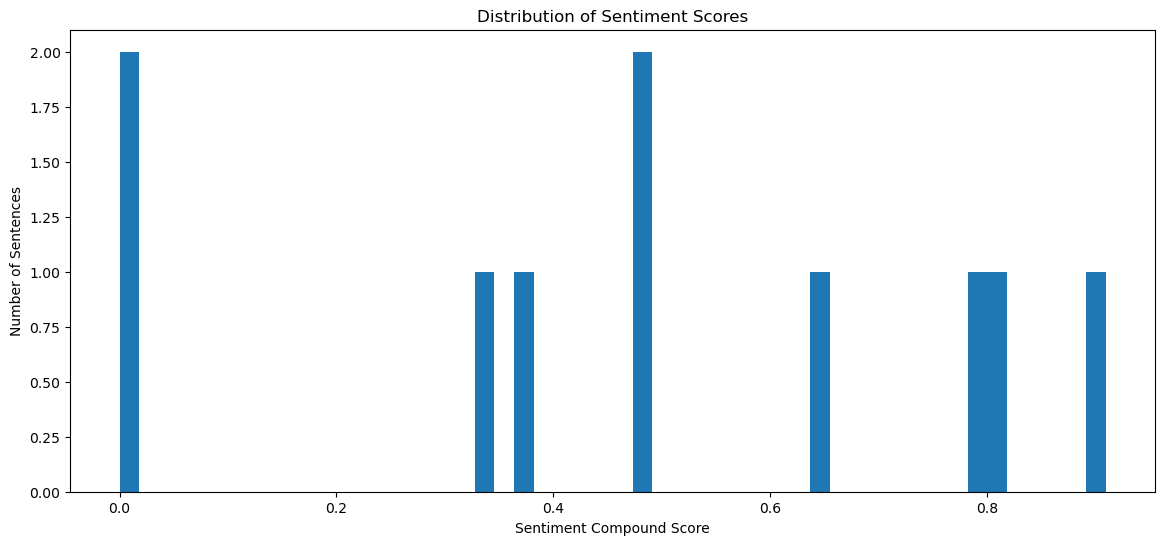

In [140]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
ndrake_df['compound'] = ndrake_df['sentences'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
ndrake_df['neg'] = ndrake_df['sentences'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
ndrake_df['neu'] = ndrake_df['sentences'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
ndrake_df['pos'] = ndrake_df['sentences'].apply(lambda x: analyzer.polarity_scores(x)['pos'])

# Print results for debugging
# print(ndrake_df[['sentences', 'compound', 'neg', 'neu', 'pos']].head())

# Aggregate and analyze sentiment results
pos_sent = ndrake_df[ndrake_df['compound'] > 0]
neg_sent = ndrake_df[ndrake_df['compound'] < 0]
neu_sent = ndrake_df[ndrake_df['compound'] == 0]

print(f"Positive Sentences: {len(pos_sent)}")
print(f"Negative Sentences: {len(neg_sent)}")
print(f"Neutral Sentences: {len(neu_sent)}")

# Visualizing sentiment analysis
plt.figure(figsize=(14, 6))
plt.hist(ndrake_df['compound'], bins=50)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('Number of Sentences')
plt.show()

### Perform Sentiment Analysis now on all 5 datasets

In [141]:
# sentiment analysis data prep
artists = ["Drake", "Bad Bunny", "Taylor Swift", "The Weeknd", "Ed Sheeran"]

analyzer = SentimentIntensityAnalyzer()
def sent_data_prep(df, artist_name):
   # Preprocessing text
    df['caption'] = df['caption'].fillna('').astype(str)
    df['caption'] = df['caption'].replace({'\n': ' ', 'Mr.': 'Mr ', 'Mrs.': 'Mrs ', 'Dr.': 'Dr '}, regex=True)

    def analyze_sentiment(text):
        sentences = sent_tokenize(text)
        total_compound = sum([analyzer.polarity_scores(sentence)['compound'] for sentence in sentences])
        average_compound = total_compound / len(sentences) if sentences else 0
        return average_compound

    # Perform sentiment analysis
    df['compound'] = df['caption'].apply(analyze_sentiment)
    df['artist'] = artist_name
    df['post_number'] = range(1, len(df) + 1)

    return df


sent_dfs = []
for df, name in zip(new_dfs, artists):
    prepped_df = sent_data_prep(df, name)
    # new_dfs.append(prepped_df)
    sent_dfs.append(prepped_df)

full_df = pd.concat(sent_dfs)

In [142]:
full_df.rename(columns = {'compound':'sentiment_score'}, inplace = True)
full_df.head()

caption  \
1350                                                                                                                                                                                                   #TSRFamilyAffairz: #SophieBrussaux, mother of #Dr ke’s son Adonis, showed #ChampagnePapi some love and support at his recent show in Toronto. Sophie even got a temporary tattoo of Dr ke on her forearm!🔥 (SWIPE) ✍🏾: #TSRStaffMM   
2040                                                                                                                                                                                                                                                                                                                                        Dr ke with Adonis walking out to accept his ARTIST OF THE DECADE award.  #bbmas  #drakedecade   
848                                                                                                                                                                                                                                        This is party goals! 🤩🥳 Dr ke shared this intimate snap of he and Adele partying together at his birthday bash earlier in the week. (Side note: we love her new ‘do!) 📸: @champagnepapi @adele   
999                                                                                                                                                                                                         @champagnepapi rides in his #maybach listening to “Far” by @gunna ft @thuggerthugger1, while wearing a diamond encrusted @rolex watch with a @chromeheartsofficial braclet. #upscalehype #drake #drakeuh #rolex #chromehearts   
1985  Dr ke & Adonis courtside at MSG tonight 🏀🤍 @champagnepapi @nyknicks  #drake #itsallablurtour #itsallablur  #scaryhours3 #drizzy #the6ix #redbutton #evilways #hoursinsilence #youbrokemyheart #madisonsquaregarden  #forallthedogs #newyork  #turks #21savage  #champagnepapi #ovo #clb  #goat #adonisgraham #herloss #newyorkknicks  #aubreygraham #theboy  #rap #hiphop @champagnepapi  #classic #6god #skepta #certifiedloverboy   

                                           url  likesCount  \
1350  https://www.instagram.com/p/CyHBGLyvYl4/      277413   
2040  https://www.instagram.com/p/CPPRiQ-BEQR/       70658   
848   https://www.instagram.com/p/B4DJqxWnTAL/       39611   
999   https://www.instagram.com/p/CCLGetuAq9a/       29671   
1985  https://www.instagram.com/p/C2nm5d-Md1I/       25828   

                                                                                                                                                                                                                                                                                                                                                                                                                                  sentences  \
1350                                                                                                                                                                                                  [#TSRFamilyAffairz: #SophieBrussaux, mother of #Dr ke’s son Adonis, showed #ChampagnePapi some love and support at his recent show in Toronto., Sophie even got a temporary tattoo of Dr ke on her forearm!🔥 (SWIPE) ✍🏾: #TSRStaffMM]   
2040                                                                                                                                                                                                                                                                                                                                        [Dr ke with Adonis walking out to accept his ARTIST OF THE DECADE award., #bbmas  #drakedecade]   
848                                                                                                                                                                              

#### Plot the heatmap using Altair

In [143]:
import altair as alt

# Creating the heatmap
caption_heatmap = alt.Chart(full_df).mark_rect().encode(
    x='post_number:O',
    y='artist:N',
    color=alt.Color('sentiment_score:Q', 
        scale=alt.Scale(domain=[-1, 0, 1], 
            range=['red', 'orange', 'green']),
        legend=alt.Legend(title="Sentiment Score")),
tooltip=['artist', 'post_number', 'sentiment_score']
).properties(
    title='Caption Sentiment Analysis Heatmap of Spotify Artists and their Top 10 Related Instagram Posts',
    width=800,
    height=400   
)

caption_heatmap.display()

alt.Chart(...)

### Generate a heatmap representing a sentiment analysis of the comments from each top post

In [144]:
# view post URLs to access IG comments
for df in new_dfs:
    print(df)
    print('\n\n')

                                                                                                                                                                                                                                                                                                                                                                                                                                  caption  \
1350                                                                                                                                                                                                   #TSRFamilyAffairz: #SophieBrussaux, mother of #Dr ke’s son Adonis, showed #ChampagnePapi some love and support at his recent show in Toronto. Sophie even got a temporary tattoo of Dr ke on her forearm!🔥 (SWIPE) ✍🏾: #TSRStaffMM   
2040                                                                                                                                          

### Read in the comment data

In [145]:
# Define the base directory
base_dir = '../datasets/post_comment_data'

# List of artists
artists = ['drake', 'bbunny', 'tswift', 'the_weeknd', 'ed_sheeran']

# Dictionary to hold the master dataframes for each artist
master_dataframes = {}
master_df_list = []

for artist in artists:
    # Initialize a list to hold DataFrames
    frames = []
    
    # Directory path for the artist
    artist_dir = os.path.join(base_dir, artist)
    
    # Iterate through each post CSV file
    for i in range(1, 11):  # Assuming there are 10 posts
        file_path = os.path.join(artist_dir, f'{artist}_post{i}_comments.csv')
        # print(f"Looking for file: {file_path}")
        
        # Check if the file exists
        if os.path.exists(file_path):
            # print(f"Reading file: {file_path}")
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Add a column indicating the post number & Artist
            df['Post_Number'] = i
            if artist == 'drake':
                df['Artist'] = 'Drake'
            elif artist == 'bbunny':
                df['Artist'] = 'Bad Bunny'
            elif artist == 'tswift':
                df['Artist'] = 'Taylor Swift'
            elif artist == 'the_weeknd':
                df['Artist'] = 'The Weeknd'
            elif artist == 'ed_sheeran':
                df['Artist'] = 'Ed Sheeran'
            
            # Append to the list of DataFrames
            frames.append(df)
        else:
            print(f"File not found: {file_path}")  # Debug: File not found

    # Check if any DataFrames were added to the list
    if frames:
        # Concatenate all DataFrames into a single master DataFrame
        master_df = pd.concat(frames, ignore_index=True)
        
        # Store the master DataFrame in the dictionary
        master_dataframes[artist] = master_df
        master_df_list.append(master_df)
    
    else:
        print(f"No files read for artist: {artist}")  # Debug: No files were read
        
# Results in a dictionary `master_dataframes` where each key is an artist name
# and the value is their corresponding master DataFrame.

File not found: ../datasets/post_comment_data\tswift\tswift_post10_comments.csv


In [146]:
master_dataframes['drake'].tail()

User Id    User Name         Comment Id                Comment Text  \
918  34139565102       kqmxpz  17906629694841101  Don’t think we forgot what   
919  60183676663  amelie_2307  18249862741244484                         NaN   
920  62842673747  theyluvgzll  17973445433668177                         NaN   
921  59706764039  210_aadrian  17928753455824540                         NaN   
922  61202318003   alex_.16_c  17993081690542997                         NaN   

                               Profile URL  \
918       https://www.instagram.com/kqmxpz   
919  https://www.instagram.com/amelie_2307   
920  https://www.instagram.com/theyluvgzll   
921  https://www.instagram.com/210_aadrian   
922   https://www.instagram.com/alex_.16_c   

                                                                                                     Avatar URL  \
918  https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-19/434280150_3225227931119829_4865302252020618118_n.jpg   
919  https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-19/435800032_1660021844535004_4077038813739610841_n.jpg   
920  https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-19/435896397_1579438452857040_5578745276656907914_n.jpg   
921    https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-19/434888484_272659642557694_755725914615039606_n.jpg   
922   https://instagram.fftw1-1.fna.fbcdn.net/v/t51.2885-19/420459809_938235541210877_4696868500456650058_n.jpg   

              Publish Date  Post_Number Artist  
918  2/22/2024, 2:34:44 PM           10  Drake  
919  2/22/2024, 4:15:30 PM           10  Drake  
920  2/22/2024, 5:05:54 PM           10  Drake  
921  2/22/2024, 6:07:04 PM           10  Drake  
922  2/22/2024, 7:16:26 PM           10  Drake

#### Perform sentiment analysis on comment data
We'll calculate the average sentiment score of all the comments per post.

In [147]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import altair as alt

# Define the artists based on your data
artists = ["Drake", "Bad Bunny", "Taylor Swift", "The Weeknd", "Ed Sheeran"]

analyzer = SentimentIntensityAnalyzer()

def sent_data_prep(df, artist_name):
    # Assuming 'comment' column holds the comments
    df['Comment Text'] = df['Comment Text'].fillna('').astype(str)
    df['Comment Text'] = df['Comment Text'].replace({'\n': ' ', 'Mr.': 'Mr ', 'Mrs.': 'Mrs ', 'Dr.': 'Dr '}, regex=True)

    def analyze_sentiment(text):
        sentences = sent_tokenize(text)
        total_compound = sum([analyzer.polarity_scores(sentence)['compound'] for sentence in sentences])
        # average_compound = total_compound / len(sentences) if sentences else 0
        return total_compound

    # Perform sentiment analysis
    df['compound'] = df['Comment Text'].apply(analyze_sentiment)
    df = df.groupby('Post_Number').compound.mean().reset_index()
    df['artist'] = artist_name  # Assign artist name to each row

    return df

# Concatenate data for all artists
sent_dfs = []

for df, name in zip(master_df_list, artists):
    prepped_df = sent_data_prep(df, name)
    sent_dfs.append(prepped_df)

full_df = pd.concat(sent_dfs)

# Rename columns as needed
full_df.rename(columns={'compound': 'avg_sentiment_score'}, inplace=True)

In [148]:
print(full_df.shape)
full_df.head()

(49, 3)


Post_Number  avg_sentiment_score artist
0            1             0.237231  Drake
1            2             0.164437  Drake
2            3             0.218650  Drake
3            4             0.038061  Drake
4            5             0.161009  Drake

In [149]:
# Creating the heatmap
comment_heatmap = alt.Chart(full_df).mark_rect().encode(
    x='Post_Number:O',
    y='artist:N',
    color=alt.Color('avg_sentiment_score:Q',
        legend=alt.Legend(title="Sentiment Score")),
    tooltip=['artist', 'Post_Number', 'avg_sentiment_score']
).properties(
    title='Comment Sentiment Analysis Heatmap of Spotify Artists and their Top 10 Related Instagram Posts',
    width=800,
    height=400   
)

comment_heatmap.display()

alt.Chart(...)

### Horizontally concatenate the heat maps

In [150]:
concatenated_heatmaps = caption_heatmap | comment_heatmap

concatenated_heatmaps.display()

alt.HConcatChart(...)